# **Laboratorio 6: Implementación algoritmo de descenso de gradiente**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Tobón Molina
2.   David Santiago Rodríguez Quiroga

**Número del grupo**

Grupo 2

El descenso de gradiente es un algoritmo iterativo de optimización que se utiliza para encontrar un mínimo/máximo local de una función determinada. Este método es usado comunmente en *machine learning* para minimizar una función de costo (por ejemplo, al encontrar los coeficientes que mejor se ajustan a una regresión lineal).


---


## **Gradiente:**

En los laboratorios pasados vimos que para obtener el gradiente de una función $f:\mathbb{R^n}→\mathbb{R}$, se debe calcular la derivada parcial con respecto a cada variable por lo que el gradiente queda de la forma:

\begin{align*}
  ∇f(x)= \left [\frac{∂f}{∂x_1} , \frac{∂f}{∂x_2}, ..., \frac{∂f}{∂x_n}\right]^T
\end{align*}

Donde $x$ es el vector de variables independientes $x^*=[x_1^*,x_2^*, ..., x_n^*]^T$,

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/3d-gradient-cos.svg/1280px-3d-gradient-cos.svg.png" width="500"/>
</div>
Figura 1. Dada una función $f(x)$, el gradiente de esta función se puede entender como un campo de vectores que apuntan hacia el lugar donde la función crece, cuyas magnitudes vectotriales indican la tasa con la cual crece.


## **Descenso de gradiente:**

Ahora que sabemos que el gradiente permite inferir la dirección hacia donde la función crece, podemos utilizarla para encontrar el minimizador de una función para esto cambiamos la dirección de los vectores multiplicando por -1 la función gradiente. De aquí, solo nos queda decir cuánto avanzamos en cada paso. Por lo que al final podemos establecer que:

\begin{align*}
  x(k+1) = x(k)- α ∇f(x(k)) 
\end{align*}

Donde el parámetro α corresponde al tamaño del paso.

Entonces el pseudoalgoritmo del descenso de gradiente quedaría así:


> 0. Defina un valor de $α$, un valor para $x(0)$, un parámetro de convergencia $ϵ$ y un número máximo de pasos $N_{max}$. \
> 1. Inicialice las variables $x = x(k)$, $k = 0$.
> 2.Procedimiento iterativo hasta condición de parada:\
>  2.1. Calcule $∇f(x(k))$ \
>  2.2. Actualice $x(k+1) = x(k)- α ∇f(x(k))$ \
>  2.4. Si $k+1 \geq N_{max}$, parar, de lo contrario, seguir al paso 2.5.\
>  2.5. Si $||x(k+1)-x(k)||_2>ϵ$, hacer $k = k+1$ y volver al paso 2.1, de lo contrario, parar.
> 3. Retorne $x(k)$




1. Tenga en cuenta la siguiente forma cuadrática:

\begin{align*}
  f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^TQ\mathbf{x}+B^T\mathbf{x}+C
\end{align*}

donde 

\begin{align}
Q = \begin{pmatrix}
1 & 3 \\
-2 & 1
\end{pmatrix}
\end{align}

\begin{align}
B = \begin{pmatrix}
1/2 \\
1
\end{pmatrix}
\end{align}

\begin{align}
C= 5
\end{align}

Con 

\begin{align}
x= [x_1, x_2]^T
\end{align}



Diseñe una función que reciba como parámetros un punto inicial $x(0) = [x_1(0), x_2(0)]^T$, un parámetro de convergencia $ϵ$, un tamaño de paso $\alpha$ y un número máximo de iteraciones $N_{max}$. Esta función debe implementar el descenso de gradiente para la forma cuadrática anterior y retornar una matriz cuya primera columna sea los valores en todas las iteraciones de $x_1$, la segunda columna los valores de todas las iteraciones de $x_2$, y la tercera columna, los valores de la función evaluada en los puntos en cada iteración. En caso de que se alcance el número de iteraciones máximo, debe imprimir que el algoritmo no convergió. 

In [84]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

def eigen(matrix):

    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    eigenvectors = np.transpose(eigenvectors)

    for i in range(len(eigenvectors)):
        eigenvectors[i] = eigenvectors[i]/np.linalg.norm(eigenvectors[i])

    return eigenvalues, eigenvectors

def eigen_matrixes(Q):
    
    M_eigenvalues = None
    M_eigenvectors = None
    
    n, m = Q.shape
    
    if n == m:
        # Obtener Qs
        Qs = (Q+Q.T)/2
        eigenvalues, eigenvectors = eigen(Qs)
        # Armar matriz de valores propios
        M_eigenvalues = np.zeros((n,n))
        np.fill_diagonal(M_eigenvalues, eigenvalues)
        
        M_eigenvectors = eigenvectors.T
        
    return M_eigenvalues

diagonalizar = eigen_matrixes

def graph_curvas_nivel(sol_matrix,diagonalizar):

    Q_graph = np.array([[1, 3], [-2, 1]])
    Q_s_graph = diagonalizar(Q_graph)
    #Q_s_graph = (Q_graph+Q_graph.T)/2
    B_graph = np.array([[1/2], [1]]).T
    C_graph = 5
    
   
    x_1, x_2 = np.linspace(-10, 10, 200), np.linspace(-10, 10, 200)
    
    X1, X2 = np.meshgrid(x_1, x_2)
    vector_x = np.array([[X1], [X2]])
    function_graph = X1**2 * Q_s_graph[0, 0] + X2**2 * Q_s_graph[1, 1] + X1 * X2 * (Q_s_graph[0, 1]+Q_s_graph[1, 0])\
    + B_graph[0,0]*X1 + B_graph[0,1]*X2 + C_graph

    lvls =[]
    fig = plt.figure()
    for i in sol_matrix:
        lvls.append(i[2])
    if sol_matrix[0][2]>sol_matrix[1][2]:
        lvls = lvls[::-1]
    plt.contour(X1, X2, function_graph, levels=lvls, colors='red')
    plt.show()


x1, x2 = symbols('x1 x2')
x = Matrix([x1, x2])
Q = Matrix([[1, 3], [-2, 1]])
B = Matrix([[1/2], [1]])
C = 5

Qs = (Q+Q.T)/2

funcion = (x.T*Qs*(x)) + (B.T)*x
funcion = funcion[0] + C
verificacion = funcion.subs([(x1, 2), (x2, 2)])

def descenso_de_gradiente_v1(f_x, x, E: float, step_size: float, max_nit: int) -> list:

    x1, x2 = symbols('x1 x2')
    x_k = x
    sol_matrix = []
    i = 0
    converges = False

    gradiente = Matrix([diff(f_x, x1), diff(f_x, x2)])

    while i < max_nit:
        
        sol_matrix.append([])
        sol_matrix[i].append(x_k[0])
        sol_matrix[i].append(x_k[1])
        sol_matrix[i].append(f_x.subs([(x1, x_k[0]), (x2, x_k[1])]))

        # descenso de gradiente
        grad_x_k = gradiente.subs([(x1, x_k[0]), (x2, x_k[1])])
        x_n = x_k - step_size*grad_x_k
        resta = x_n - x_k
        norma_l2 = sqrt(abs(resta[0])**2 + abs(resta[1])**2)

        if norma_l2 <= E:
            converges = True
            break

        converges = False
        x_k = x_n
        i += 1

    if not converges:
        print("El algoritmo no convergió")

    return sol_matrix, i

2. Ahora, se desea probar tres valores para el tamaño de paso:

*   $α = 0.1$
*   $α = 0.5$
*   $α = 0.8$

Con los siguientes valores:

*   $ϵ = 0.1$
*   $N_{max}=100$
*   $x(0) = [2,2]^T$

Implemente su función anterior con los parámetros indicados.


Step size de 0.1:
[2, 2, 20.0000000000000]
[1.35000000000000, 1.30000000000000, 12.2425000000000]
[0.900000000000000, 0.805000000000000, 8.43752500000000]
[0.589500000000000, 0.454000000000000, 6.57000925000000]
[0.376200000000000, 0.204250000000000, 5.65243335250000]
[0.230535000000000, 0.0257799999999999, 5.20080168692500]
[0.131850000000000, -0.102429500000000, 4.97786639539525]
[0.0657229500000001, -0.195128600000000, 4.86730312447329]
7 iteraciones



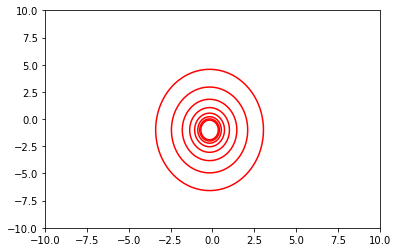

Step size de 0.5:
[2, 2, 20.0000000000000]
[-1.25000000000000, -1.50000000000000, 8.56250000000000]
[0.500000000000000, 0.125000000000000, 5.70312500000000]
[-0.312500000000000, -0.750000000000000, 4.98828125000000]
[0.125000000000000, -0.343750000000000, 4.80957031250000]
[-0.0781250000000000, -0.562500000000000, 4.76489257812500]
[0.0312500000000000, -0.460937500000000, 4.75372314453125]
6 iteraciones



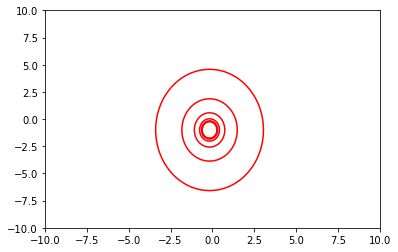

El algoritmo no convergió
Step size de 0.8:
[2, 2, 20.0000000000000]
[-3.20000000000000, -3.60000000000000, 34.5200000000000]
[4.40000000000000, 3.92000000000000, 63.0944000000000]
[-6.17600000000000, -6.67200000000000, 119.104832000000]
[8.64320000000001, 8.14400000000000, 228.885463040000]
[-12.1011200000000, -12.6009600000000, 444.055507251200]
[16.9414400000000, 16.4414720000000, 865.788794200065]
[-23.7180416000000, -24.2180352000000, 1692.38603663164]
[33.2052531200000, 32.7052544000000, 3312.51663179799]
[-46.4873553920000, -46.9873551360000, 6487.97259832406]
[65.0822973440001, 64.5822973952001, 12711.8662927152]
[-91.1152163225601, -91.6152163123201, 24910.6979337217]
[127.561302843392, 127.061302845440, 48820.4079500946]
[-178.585823982387, -179.085823981978, 95683.4395821854]
[250.020153575015, 249.520153575097, 187534.981581083]
[-350.028215005086, -350.528215005070, 367564.003898924]
[490.039501007108, 489.539501007111, 720420.887641890]
[-686.055301409953, -686.5553014099

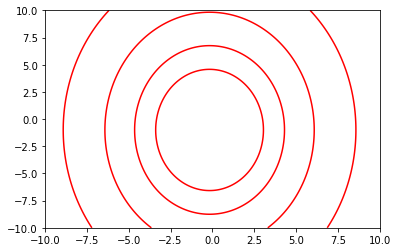

In [85]:
x1 = 2
x2 = 2
x = Matrix([[x1], [x2]])
E = 0.1
step_sizes = [0.1, 0.5, 0.8]
max_nit = 100
sol = None

for step_size in step_sizes:
    sol = descenso_de_gradiente_v1(funcion, x, E, step_size, max_nit)
    print(f"Step size de {step_size}:")
    for i in sol[0]:
        print(i)
    print(f"{sol[1]} iteraciones\n")
    graph_curvas_nivel(sol[0],diagonalizar)


3. Reescriba la función del primer punto pero esta vez, el criterio de parada debe ser basado en cómo cambia el gradiente de la función: $||∇f(x(k))||_2≤\epsilon$.


In [86]:
def descenso_de_gradiente_v2(f_x, x, E: float, step_size: float, max_nit: int) -> list:

    x1, x2 = symbols('x1 x2')
    x_k = x
    sol_matrix = []
    i = 0
    converges = False

    gradiente = Matrix([diff(f_x, x1), diff(f_x, x2)])

    while i < max_nit:

        sol_matrix.append([])
        sol_matrix[i].append(x_k[0])
        sol_matrix[i].append(x_k[1])
        sol_matrix[i].append(f_x.subs([(x1, x_k[0]), (x2, x_k[1])]))
        # descenso de gradiente
        grad_x_k = gradiente.subs([(x1, x_k[0]), (x2, x_k[1])])
        cambio_grad = sqrt(abs(grad_x_k[0])**2 + abs(grad_x_k[1])**2)
        x_n = x_k - step_size*grad_x_k

        if cambio_grad <= E:
            converges = True
            break


        converges = False
        x_k = x_n
        i += 1

    if not converges:
        print("El algoritmo no convergió")

    return sol_matrix, i

4. Corra el algoritmo modificado con un tamaño de paso que haga el algoritmo eficiente, es decir, escoja entre los valores anteriores el tamaño de paso más grande entre tal que el algoritmo converja. Sin embargo, en esta vez, se desea probar tres valores para el parámetro de convergencia $ϵ$:



*   $ϵ=0.1$
*   $ϵ=0.5$
*   $ϵ=1$



Con E = 0.1:
[2, 2, 20.0000000000000]
[-1.25000000000000, -1.50000000000000, 8.56250000000000]
[0.500000000000000, 0.125000000000000, 5.70312500000000]
[-0.312500000000000, -0.750000000000000, 4.98828125000000]
[0.125000000000000, -0.343750000000000, 4.80957031250000]
[-0.0781250000000000, -0.562500000000000, 4.76489257812500]
[0.0312500000000000, -0.460937500000000, 4.75372314453125]
[-0.0195312500000000, -0.515625000000000, 4.75093078613281]
7 iteraciones



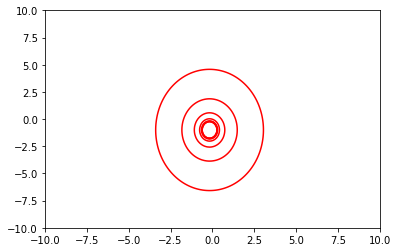

Con E = 0.5:
[2, 2, 20.0000000000000]
[-1.25000000000000, -1.50000000000000, 8.56250000000000]
[0.500000000000000, 0.125000000000000, 5.70312500000000]
[-0.312500000000000, -0.750000000000000, 4.98828125000000]
[0.125000000000000, -0.343750000000000, 4.80957031250000]
[-0.0781250000000000, -0.562500000000000, 4.76489257812500]
[0.0312500000000000, -0.460937500000000, 4.75372314453125]
[-0.0195312500000000, -0.515625000000000, 4.75093078613281]
7 iteraciones



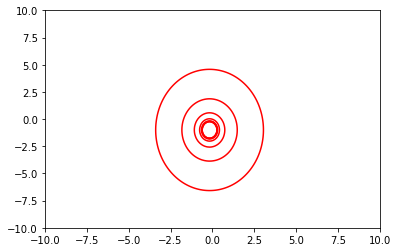

Con E = 1:
[2, 2, 20.0000000000000]
[-1.25000000000000, -1.50000000000000, 8.56250000000000]
[0.500000000000000, 0.125000000000000, 5.70312500000000]
[-0.312500000000000, -0.750000000000000, 4.98828125000000]
[0.125000000000000, -0.343750000000000, 4.80957031250000]
[-0.0781250000000000, -0.562500000000000, 4.76489257812500]
[0.0312500000000000, -0.460937500000000, 4.75372314453125]
[-0.0195312500000000, -0.515625000000000, 4.75093078613281]
7 iteraciones



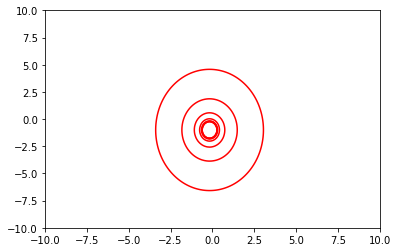

In [87]:
Es = [0.1, 0.5, 1]
# Se selecciona el mejor step_size según los resultados de la celda anterior
step_size = 0.5

for e in Es:
    sol = descenso_de_gradiente_v2(funcion, x, E, step_size, max_nit)
    print(f"Con E = {e}:")
    for i in sol[0]:
        print(i)
    print(f"{sol[1]} iteraciones\n")
    graph_curvas_nivel(sol[0],diagonalizar)
    

5. Realice dos gráficas: una debe incluir las curvas de nivel para los valores de $f$ en cada iteración, donde se muestre la trayectoria del descenso de gradiente con convergencia basada en $||x(k+1)-x(k)||_2>ϵ$. La otra debe tener las curvas de nivel para los valores de $f$ en cada iteración, donde se muestre la trayectoria del descenso de gradiente basado en la convergencia $||∇f(x(k))||_2≤\epsilon$. **(Use la matriz que genera su función)**. Se debe ver algo así:

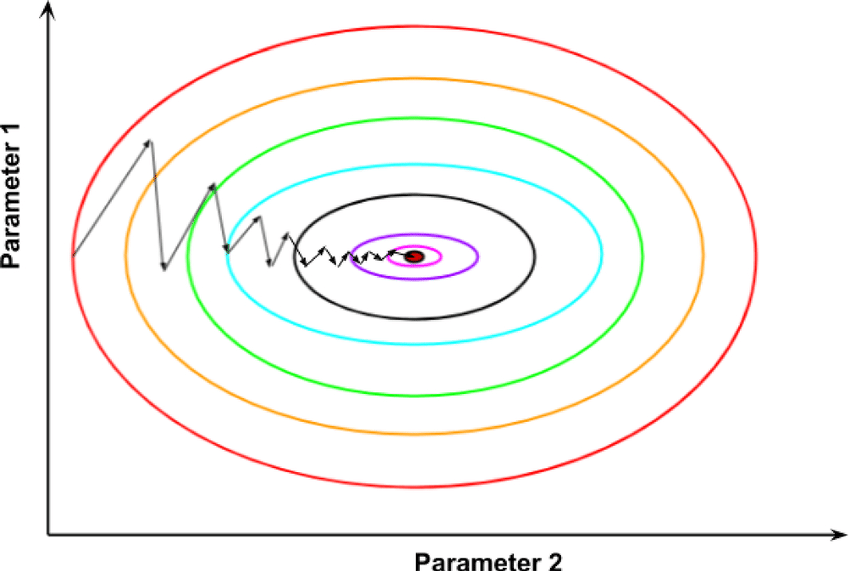

6. Responder las siguientes pregutnas:

- ¿Cuál tamaño de paso fue más eficiente?, explique.

- ¿Por qué cree que un tamaño de paso muy grande no permite alcanzar la convergencia?

- ¿Cómo influye el parámetro de convergencia $ϵ$ en la eficiencia del algoritmo?

- ¿Qué pasaría si se usa el descenso de gradiente con una forma cuadrática no convexa?